# Options for Accessing ATL24

### Imports

In [1]:
from sliderule import sliderule
import matplotlib.pyplot as plt
import numpy as np

### Configuration

In [2]:
# configure sliderule to output verbose log messages
sliderule.init("localhost", organization=None, verbose=True)

Setting URL to localhost


True

In [3]:
# color map for ATL24 classifications
COLORS = {
    0: ['gray', 'unclassified'],
    40: ['red', 'bathymetry'],
    41: ['blue', 'sea_surface']
}

In [4]:
# plot ATL24 dataframes
def plot_atl24(gdf, x_min, x_max, column=None):
    start_xatc = np.min(gdf['x_atc'])
    fig,ax = plt.subplots(1, 1, figsize=(18, 6), constrained_layout=True)
    if column == None:
        for class_val, color_name in COLORS.items():
            ii=gdf["class_ph"]==class_val
            ax.plot(gdf['x_atc'][ii]-start_xatc, gdf['ortho_h'][ii], 'o', markersize=1, color=color_name[0], label=color_name[1])
    else:
        sc = ax.scatter(gdf['x_atc']-start_xatc, gdf['ortho_h'], c=gdf[column], cmap='viridis')
    ax.set_xlim(x_min, x_max)
    plt.show()

In [5]:
# plot ATL06 dataframes
def plot_atl06(gdf, x_min, x_max, column=None):
    start_xatc = np.min(gdf['x_atc'])
    fig,ax = plt.subplots(1, 1, figsize=(18, 6), constrained_layout=True)
    ax.plot(gdf['x_atc']-start_xatc, gdf['h_mean'], 'o', markersize=5, color='red')
    ax.set_xlim(x_min, x_max)
    plt.show()

In [6]:
# plot ATL03 dataframes
def plot_atl03(gdf, x_min, x_max, column=None):
    start_xatc = np.min(gdf['x_atc'])
    fig,ax = plt.subplots(1, 1, figsize=(18, 6), constrained_layout=True)
    if column == None:
        for class_val, color_name in COLORS.items():
            ii=gdf["atl24_class"]==class_val
            ax.plot(gdf['x_atc'][ii]-start_xatc, gdf['height'][ii], 'o', markersize=1, color=color_name[0], label=color_name[1])
    else:
        sc = ax.scatter(gdf['x_atc']-start_xatc, gdf['height'], c=gdf[column], cmap='viridis')
    ax.set_xlim(x_min, x_max)
    plt.show()

### Define Area of Interest (north short of Dominican Republic)

In [7]:
aoi = [ { "lat": 19.42438470712139, "lon": -69.79907695695609  },  
        { "lat": 19.31125534696085,  "lon": -69.79907695695609 },
        { "lat": 19.31125534696085,  "lon": -69.33527941905237 },
        { "lat": 19.42438470712139,  "lon": -69.33527941905237 },
        { "lat": 19.42438470712139,  "lon": -69.79907695695609 } ]

# (1) Quick Access

In [8]:
gdf1 = sliderule.run("atl24x", {}, aoi=aoi)

request <AppServer.36> retrieved 114 resources
Starting proxy for atl24x to process 114 resource(s) with 3 thread(s)
request <AppServer.39> on ATL03_20221109091441_07581707_006_01.h5 sent dataframe [gt1l] with 1 rows and 9 columns
request <AppServer.39> on ATL03_20221109091441_07581707_006_01.h5 sent dataframe [gt1r] with 14 rows and 9 columns
request <AppServer.39> on ATL03_20221109091441_07581707_006_01.h5 sent dataframe [gt3l] with 0 rows and 9 columns
request <AppServer.39> on ATL03_20221109091441_07581707_006_01.h5 sent dataframe [gt3r] with 0 rows and 9 columns
request <AppServer.39> on ATL03_20221109091441_07581707_006_01.h5 sent dataframe [gt2r] with 0 rows and 9 columns
request <AppServer.39> on ATL03_20221109091441_07581707_006_01.h5 sent dataframe [gt2l] with 0 rows and 9 columns
Successfully completed processing resource [3 out of 114]: ATL03_20221109091441_07581707_006_01.h5
request <AppServer.37> on ATL03_20181117063731_07580107_006_02.h5 sent dataframe [gt3r] with 0 rows

In [9]:
gdf1

,region,class_ph,gt,surface_h,rgt,ortho_h,confidence,spot,x_atc,y_atc,cycle,geometry
time_ns,,,,,,,,,,,,
2022-11-09 09:16:39.327467520,7,40,10,0.728205,758,0.195240,0.464302,6,1.791589e+07,-1908.861816,17,POINT (-69.79595 19.38944)
2020-09-11 22:53:56.556496640,7,40,20,0.434972,1200,-7.523076,0.576154,2,1.792091e+07,-159.678635,8,POINT (-69.52446 19.34271)
2020-09-11 22:53:56.563696640,7,40,20,0.456385,1200,-6.999095,0.755757,2,1.792097e+07,-159.701355,8,POINT (-69.52451 19.34225)
2020-09-11 22:53:56.564096768,7,40,20,0.457311,1200,-6.943308,0.748279,2,1.792097e+07,-159.701401,8,POINT (-69.52451 19.34222)
2020-09-11 22:53:56.565496576,7,40,20,0.461998,1200,-6.938446,0.731910,2,1.792098e+07,-159.702576,8,POINT (-69.52452 19.34213)
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-13 11:17:28.992791296,7,40,40,0.153119,758,-5.689158,0.933973,3,1.792338e+07,10096.199219,11,POINT (-69.68929 19.31138)
2021-05-13 11:17:28.993191424,7,40,40,0.153426,758,-5.775379,0.974155,3,1.792338e+07,10096.196289,11,POINT (-69.68929 19.31136)
2021-05-13 11:17:28.993391616,7,40,40,0.153633,758,-5.703682,0.933973,3,1.792338e+07,10096.191406,11,POINT (-69.68929 19.31135)


<Axes: >

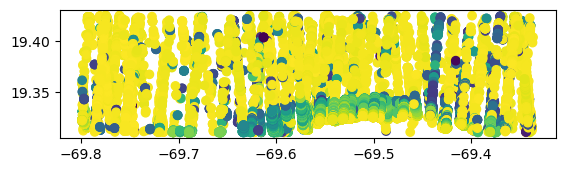

In [10]:
gdf1.plot(column='ortho_h', cmap='viridis')

# (2) Access a Single Track

In [11]:
gdf2 = sliderule.run("atl24x", {"beams": "gt3r", "rgt": 202, "cycle": 12}, aoi=aoi)

request <AppServer.269> retrieved 1 resources
Starting proxy for atl24x to process 1 resource(s) with 1 thread(s)
request <AppServer.271> on ATL03_20210706203010_02021201_006_01.h5 sent dataframe [gt3r] with 861 rows and 9 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmp74woo56g
Closing arrow file: /tmp/tmp74woo56g


In [12]:
gdf2

,region,class_ph,gt,surface_h,rgt,ortho_h,confidence,spot,x_atc,y_atc,cycle,geometry
time_ns,,,,,,,,,,,,
2021-07-06 20:35:11.700463360,1,40,60,0.469926,202,-1.126599,0.835062,1,2.147674e+06,-3246.468750,12,POINT (-69.53933 19.32204)
2021-07-06 20:35:11.700663040,1,40,60,0.470413,202,-0.581132,0.834389,1,2.147675e+06,-3246.466553,12,POINT (-69.53934 19.32205)
2021-07-06 20:35:11.701063168,1,40,60,0.471875,202,-0.498628,0.902136,1,2.147678e+06,-3246.469727,12,POINT (-69.53934 19.32207)
2021-07-06 20:35:11.701463296,1,40,60,0.473334,202,-0.584890,0.903411,1,2.147681e+06,-3246.474121,12,POINT (-69.53934 19.32210)
2021-07-06 20:35:11.701463296,1,40,60,0.473334,202,-0.621778,0.896865,1,2.147681e+06,-3246.474365,12,POINT (-69.53934 19.32210)
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06 20:35:12.498863104,1,40,60,0.550554,202,-16.173004,0.524065,1,2.153354e+06,-3247.080811,12,POINT (-69.54465 19.37310)
2021-07-06 20:35:12.505863168,1,40,60,0.544213,202,-16.016087,0.686516,1,2.153404e+06,-3247.115967,12,POINT (-69.54469 19.37355)
2021-07-06 20:35:12.505963264,1,40,60,0.543939,202,-16.114712,0.686516,1,2.153405e+06,-3247.118896,12,POINT (-69.54469 19.37356)


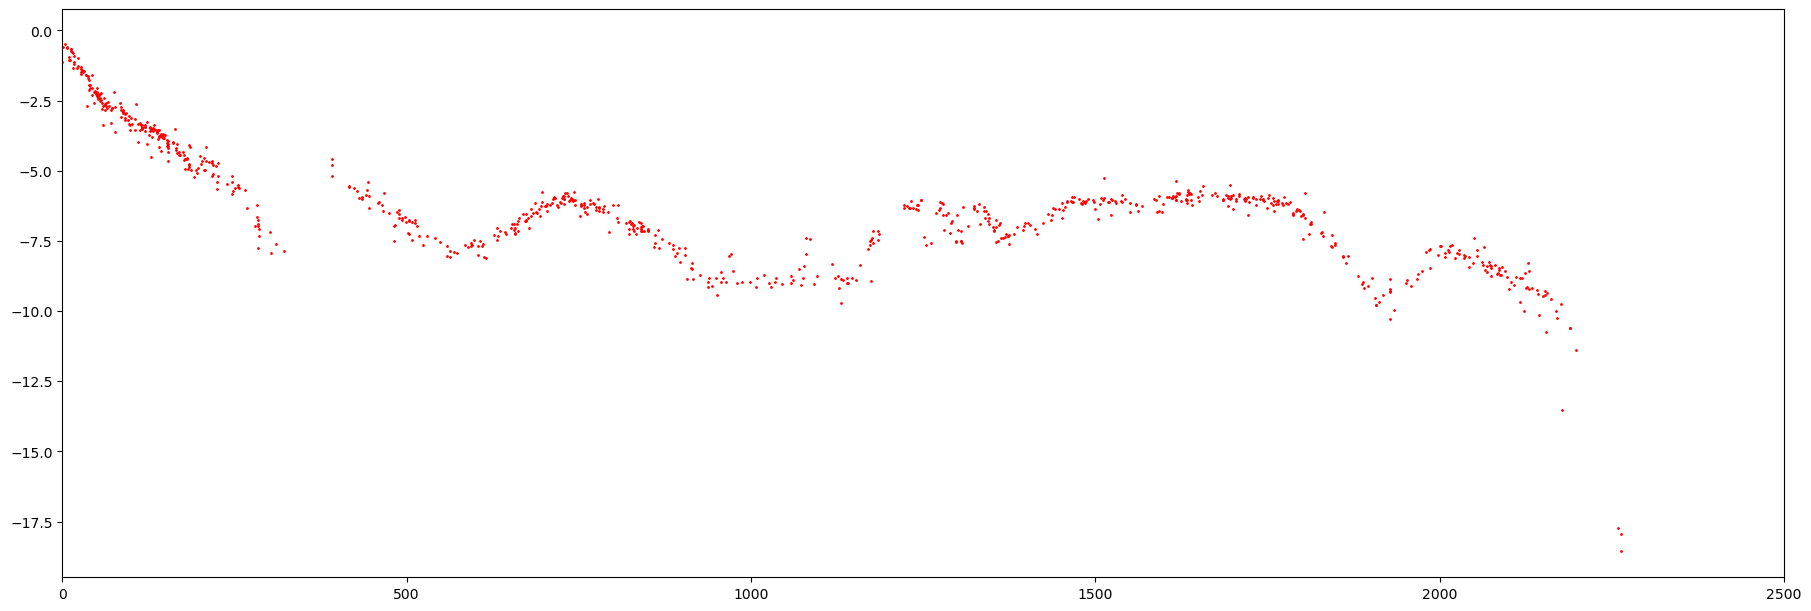

In [13]:
plot_atl24(gdf2, 0, 2500)

# (3) Detailed Access of a Single Track

In [14]:
parms = {
    "atl24": {
        "compact": False,
        "confidence": 0.0,
        "class_ph": ["unclassified", "sea_surface", "bathymetry"]
    },
    "beams": "gt3r", 
    "rgt": 202, 
    "cycle": 12
}
gdf3 = sliderule.run("atl24x", parms, aoi=aoi)

request <AppServer.274> retrieved 1 resources
Starting proxy for atl24x to process 1 resource(s) with 1 thread(s)
request <AppServer.275> on ATL03_20210706203010_02021201_006_01.h5 sent dataframe [gt3r] with 35527 rows and 17 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmpenp2o5ib
Closing arrow file: /tmp/tmpenp2o5ib


In [15]:
gdf3

,sensor_depth_exceeded,night_flag,region,class_ph,gt,sigma_tvu,surface_h,invalid_wind_speed,sigma_thu,rgt,ortho_h,invalid_kd,low_confidence_flag,confidence,spot,x_atc,y_atc,cycle,ellipse_h,geometry
time_ns,,,,,,,,,,,,,,,,,,,,
2021-07-06 20:35:11.531963136,0,0,1,0,60,0.133018,0.367559,0,7.071068,202,44.853516,1,0,1.005813e-07,1,2.146475e+06,-3246.021484,12,1.637071,POINT (-69.53822 19.31126)
2021-07-06 20:35:11.531963136,0,0,1,0,60,0.133018,0.367559,0,7.071068,202,19.080935,1,0,1.759629e-07,1,2.146475e+06,-3246.173584,12,-24.135511,POINT (-69.53821 19.31126)
2021-07-06 20:35:11.532163072,0,0,1,0,60,0.133018,0.367595,0,7.071068,202,17.941868,1,0,4.991626e-07,1,2.146476e+06,-3246.186035,12,-25.274578,POINT (-69.53822 19.31127)
2021-07-06 20:35:11.532163072,0,0,1,0,60,0.133018,0.367595,0,7.071068,202,19.654917,1,0,1.759629e-07,1,2.146476e+06,-3246.175781,12,-23.561529,POINT (-69.53822 19.31127)
2021-07-06 20:35:11.532263168,0,0,1,0,60,0.133018,0.367631,0,7.071068,202,18.562651,1,0,1.759629e-07,1,2.146477e+06,-3246.185303,12,-24.653795,POINT (-69.53822 19.31128)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06 20:35:13.300163328,0,0,1,41,60,0.133019,0.302490,0,7.071068,202,0.178398,0,0,6.079129e-04,1,2.159056e+06,-3247.663818,12,-45.176338,POINT (-69.54998 19.42436)
2021-07-06 20:35:13.300163328,0,0,1,41,60,0.133019,0.302490,0,7.071068,202,0.718899,0,0,9.107706e-06,1,2.159056e+06,-3247.660645,12,-44.635838,POINT (-69.54998 19.42436)
2021-07-06 20:35:13.300263168,0,0,1,0,60,0.133019,0.302277,0,7.071068,202,26.248211,0,0,1.364828e-07,1,2.159057e+06,-3247.511719,12,-19.106525,POINT (-69.54998 19.42437)


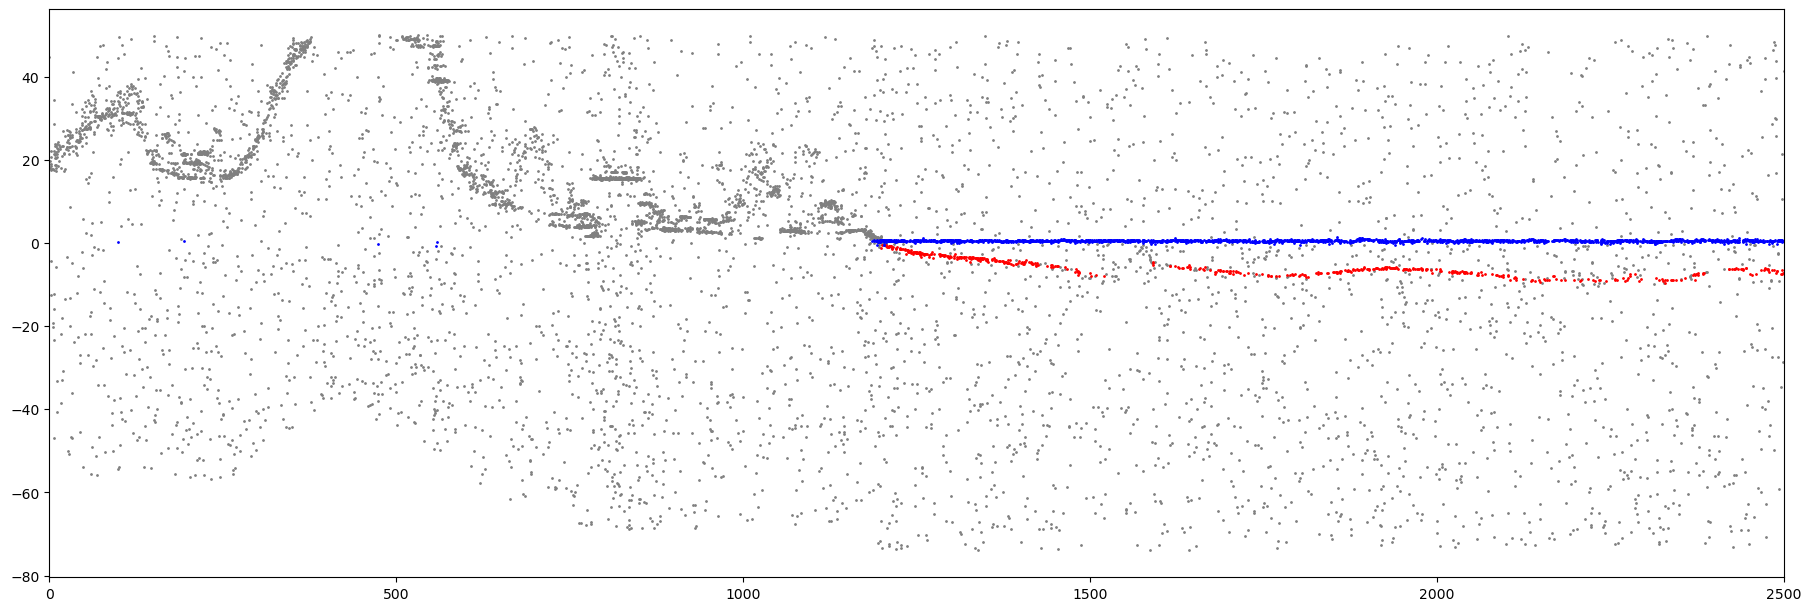

In [16]:
plot_atl24(gdf3, 0, 2500)

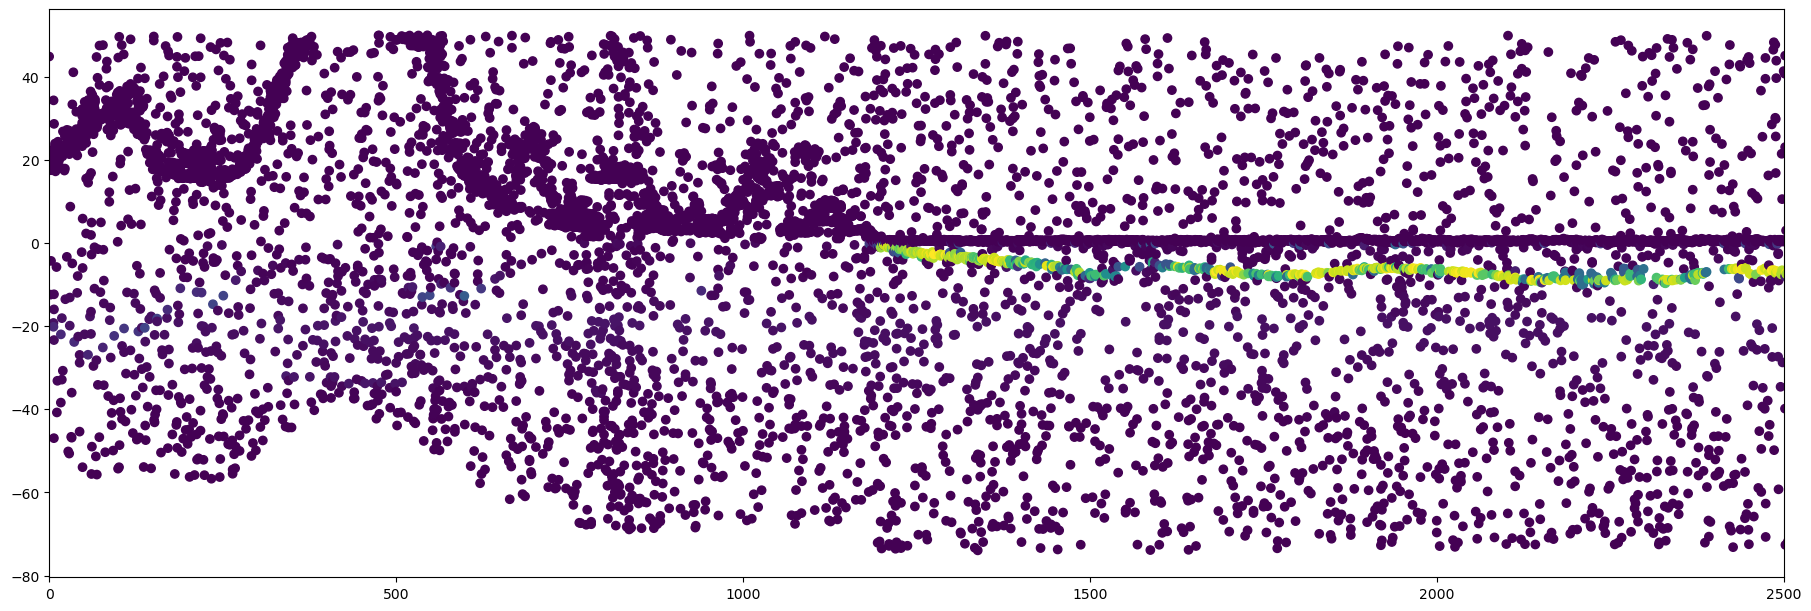

In [17]:
plot_atl24(gdf3, 0, 2500, "confidence")

# (4) Access All ATL03 Photons using ATL24 as a Classifier

In [18]:
parms = {
    "atl24": {
        "class_ph": ["unclassified", "sea_surface", "bathymetry"]
    },
    "cnf": -1,
    "beams": "gt3r", 
    "rgt": 202, 
    "cycle": 12
}
gdf4 = sliderule.run("atl03x", parms, aoi=aoi)

request <AppServer.277> retrieved 1 resources
Starting proxy for atl03x to process 1 resource(s) with 1 thread(s)
request <AppServer.278> on ATL03_20210706203010_02021201_006_01.h5 sent dataframe [gt3r] with 92953 rows and 14 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmpw6evy8ga
Closing arrow file: /tmp/tmpw6evy8ga


In [19]:
gdf4

,region,gt,spacecraft_velocity,atl24_class,solar_elevation,atl24_confidence,rgt,ph_index,height,spot,x_atc,y_atc,cycle,atl03_cnf,background_rate,quality_ph,geometry
time_ns,,,,,,,,,,,,,,,,,
2021-07-06 20:35:11.530563072,1,60,7118.208496,0,36.057114,0.000000,202,12915859,275.984528,1,2.146466e+06,-3244.365723,12,0,1202043.625,0,POINT (-69.53822 19.31118)
2021-07-06 20:35:11.530563072,1,60,7118.208496,0,36.057114,0.000000,202,12915860,241.720047,1,2.146466e+06,-3244.567871,12,0,1202043.625,0,POINT (-69.53822 19.31118)
2021-07-06 20:35:11.530563072,1,60,7118.208496,0,36.057114,0.000000,202,12915861,-87.425362,1,2.146465e+06,-3246.509766,12,0,1202043.625,0,POINT (-69.53820 19.31117)
2021-07-06 20:35:11.530563072,1,60,7118.208496,0,36.057114,0.000000,202,12915862,-125.022743,1,2.146465e+06,-3246.731689,12,0,1202043.625,0,POINT (-69.53820 19.31117)
2021-07-06 20:35:11.530563072,1,60,7118.208496,0,36.057114,0.000000,202,12915863,-164.023651,1,2.146465e+06,-3246.961914,12,0,1202043.625,0,POINT (-69.53820 19.31117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06 20:35:13.300763136,1,60,7118.194336,0,36.089127,0.000000,202,13008807,54.988625,1,2.159060e+06,-3247.083740,12,0,797021.625,0,POINT (-69.54999 19.42440)
2021-07-06 20:35:13.300863232,1,60,7118.194336,41,36.089127,0.000837,202,13008808,-45.229034,1,2.159061e+06,-3247.677246,12,4,797021.625,0,POINT (-69.54998 19.42441)
2021-07-06 20:35:13.300863232,1,60,7118.194336,41,36.089127,0.000837,202,13008809,-45.241188,1,2.159061e+06,-3247.677246,12,4,797021.625,0,POINT (-69.54998 19.42441)


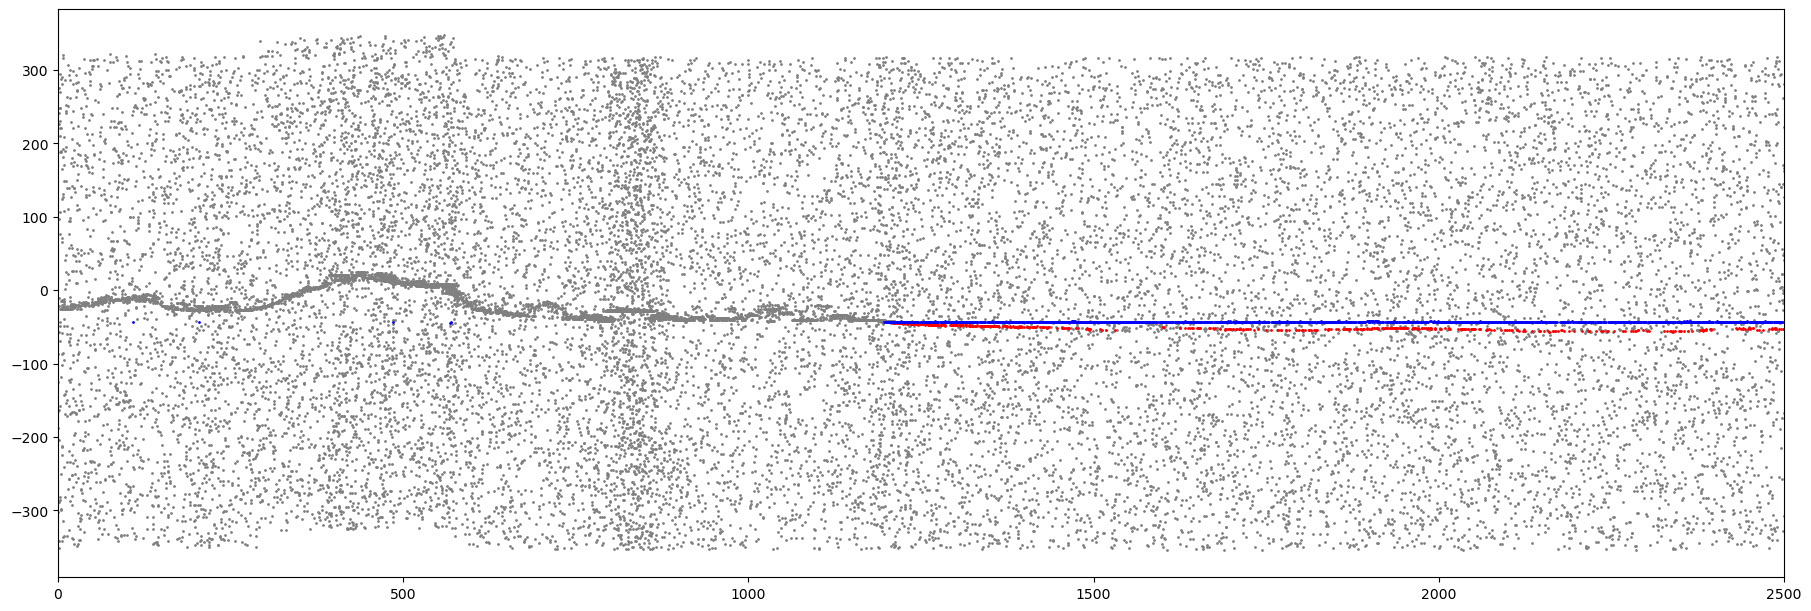

In [20]:
plot_atl03(gdf4, 0, 2500)

# (5) Combine ATL03 Filters with ATL24 Classification

In [21]:
parms = {
    "atl24": {
        "class_ph": ["unclassified", "sea_surface", "bathymetry"]
    },
    "cnf": 2,
    "yapc": {
        "version": 0,
        "score": 100
    },
    "beams": "gt3r", 
    "rgt": 202, 
    "cycle": 12
}
gdf5 = sliderule.run("atl03x", parms, aoi=aoi)

request <AppServer.280> retrieved 1 resources
Starting proxy for atl03x to process 1 resource(s) with 1 thread(s)
request <AppServer.281> on ATL03_20210706203010_02021201_006_01.h5 sent dataframe [gt3r] with 20773 rows and 15 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmpy5zdbnif
Closing arrow file: /tmp/tmpy5zdbnif


In [22]:
gdf5

,region,gt,spacecraft_velocity,atl24_class,solar_elevation,atl24_confidence,yapc_score,rgt,ph_index,height,spot,x_atc,y_atc,cycle,atl03_cnf,background_rate,quality_ph,geometry
time_ns,,,,,,,,,,,,,,,,,,
2021-07-06 20:35:11.530663168,1,60,7118.208496,0,36.057114,0.000000,63,202,12915866,-22.051737,1,2.146466e+06,-3246.126465,12,4,1202043.625,0,POINT (-69.53821 19.31118)
2021-07-06 20:35:11.530963200,1,60,7118.208496,0,36.057114,0.000000,153,202,12915888,-25.586315,1,2.146468e+06,-3246.155029,12,4,1202043.625,0,POINT (-69.53821 19.31120)
2021-07-06 20:35:11.531063040,1,60,7118.208496,0,36.057114,0.000000,138,202,12915897,-25.111528,1,2.146469e+06,-3246.154785,12,4,1202043.625,0,POINT (-69.53821 19.31120)
2021-07-06 20:35:11.531163136,1,60,7118.208496,0,36.057114,0.000000,78,202,12915898,-14.752754,1,2.146469e+06,-3246.096191,12,2,1202043.625,0,POINT (-69.53821 19.31121)
2021-07-06 20:35:11.531263232,1,60,7118.208496,0,36.057114,0.000000,154,202,12915907,-25.457888,1,2.146470e+06,-3246.162109,12,3,1202043.625,0,POINT (-69.53821 19.31122)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06 20:35:13.300163328,1,60,7118.194336,41,36.089127,0.000608,143,202,13008786,-45.176338,1,2.159056e+06,-3247.663818,12,4,797021.625,0,POINT (-69.54998 19.42436)
2021-07-06 20:35:13.300163328,1,60,7118.194336,41,36.089127,0.000009,142,202,13008787,-44.635838,1,2.159056e+06,-3247.660645,12,3,797021.625,0,POINT (-69.54998 19.42436)
2021-07-06 20:35:13.300263168,1,60,7118.194336,41,36.089127,0.000009,160,202,13008792,-44.625275,1,2.159057e+06,-3247.662354,12,3,797021.625,0,POINT (-69.54998 19.42437)


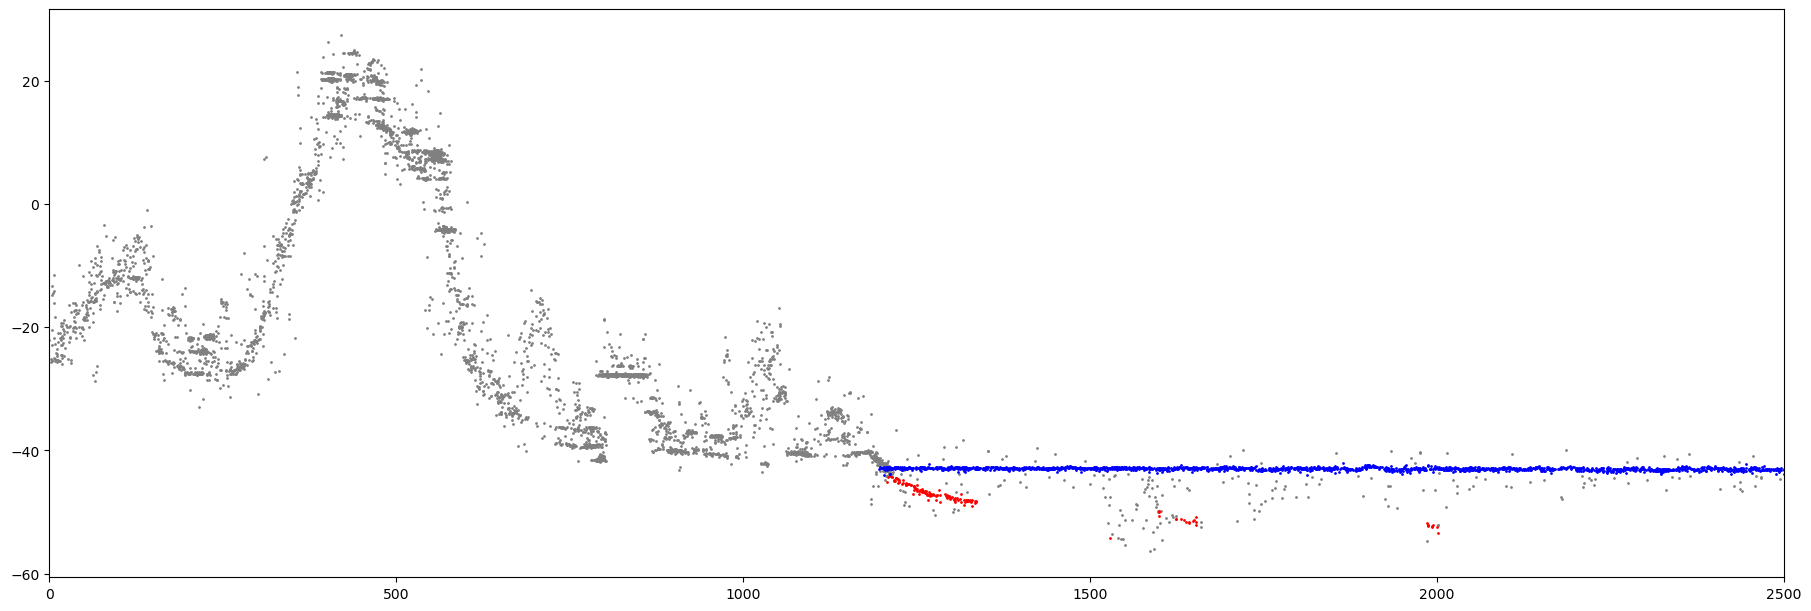

In [23]:
plot_atl03(gdf5, 0, 2500)

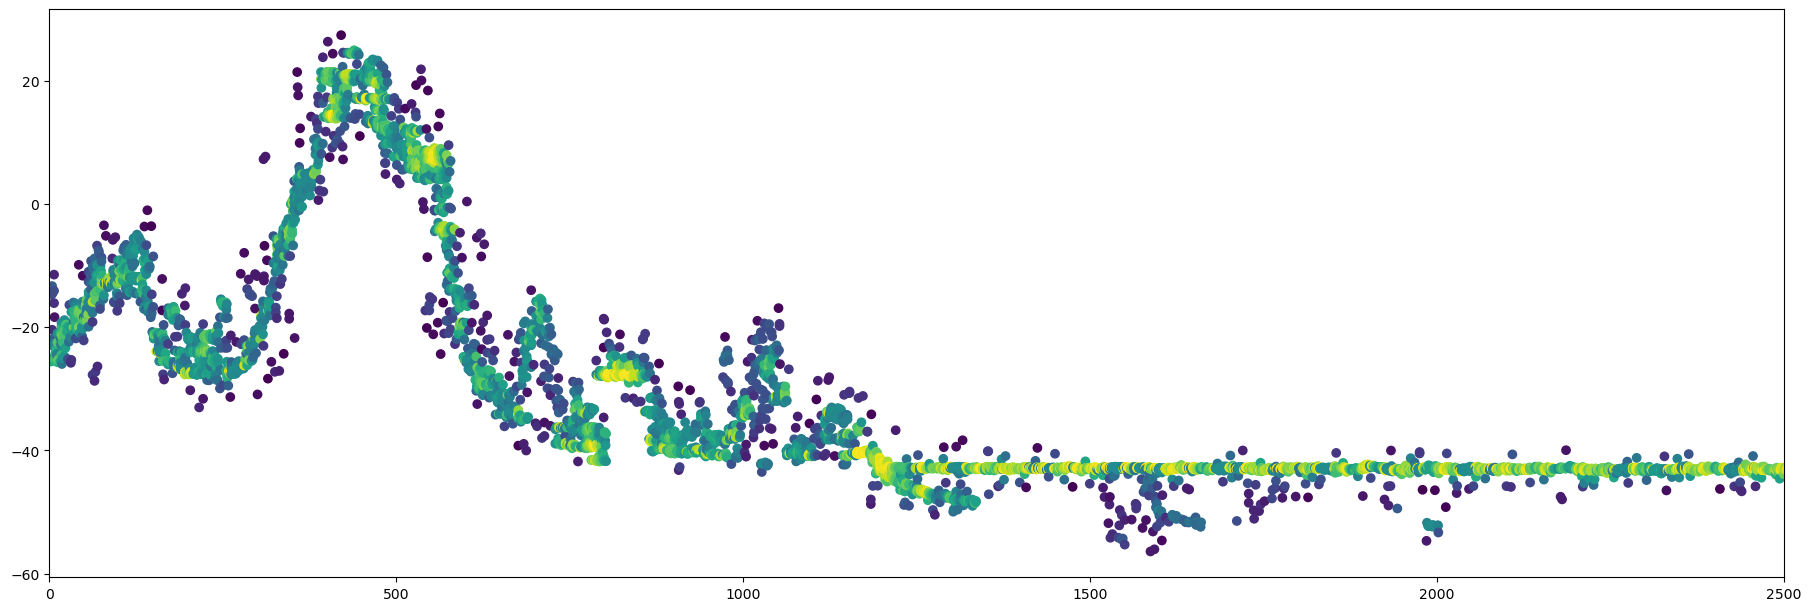

In [24]:
plot_atl03(gdf5, 0, 2500, "yapc_score")

# (6) Run ATL06-SR Surface Fitting Algorithm on ATL24 Classified Photons

In [25]:
parms = {
    "atl24": {
        "class_ph": ["bathymetry"]
    },
    "fit": {
        "res": 10,
        "len": 20,
        "pass_invalid": True
    },
    "cnf": -1,
    "beams": "gt3r", 
    "rgt": 202, 
    "cycle": 12
}
gdf6 = sliderule.run("atl03x", parms, aoi=aoi)

request <AppServer.284> retrieved 1 resources
Starting proxy for atl03x to process 1 resource(s) with 1 thread(s)
request <AppServer.285> on ATL03_20210706203010_02021201_006_01.h5 sent dataframe [gt3r] with 97 rows and 13 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmpn4_qjxx5
Closing arrow file: /tmp/tmpn4_qjxx5


In [26]:
gdf6

,pflags,region,gt,window_height,photon_count,rgt,rms_misfit,h_mean,dh_fit_dx,x_atc,h_sigma,spot,y_atc,cycle,photon_start,geometry
time_ns,,,,,,,,,,,,,,,,
2021-07-06 20:35:11.703563264,0,1,60,3.000000,37,202,3.242738e-01,-45.263342,-0.047593,2.147696e+06,5.331500e-02,1,-3246.497314,12,12931297,POINT (-69.53935 19.32224)
2021-07-06 20:35:11.706963456,0,1,60,3.000000,49,202,3.066668e-01,-46.475677,-0.051964,2.147720e+06,4.528252e-02,1,-3246.522705,12,12931612,POINT (-69.53938 19.32245)
2021-07-06 20:35:11.708363520,0,1,60,3.000000,43,202,3.673098e-01,-46.889818,-0.031286,2.147730e+06,5.684106e-02,1,-3246.527344,12,12931858,POINT (-69.53939 19.32254)
2021-07-06 20:35:11.712763904,0,1,60,3.000000,32,202,3.335851e-01,-47.622890,-0.019678,2.147761e+06,6.193327e-02,1,-3246.525635,12,12932072,POINT (-69.53942 19.32283)
2021-07-06 20:35:11.715163648,0,1,60,3.000000,38,202,2.957804e-01,-47.980107,-0.025870,2.147779e+06,4.829899e-02,1,-3246.521729,12,12932292,POINT (-69.53943 19.32298)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06 20:35:12.017863168,2,1,60,3.612736,2,202,5.024296e-15,-67.658188,-0.139631,2.149933e+06,5.024296e-15,1,-3246.874268,12,12949372,POINT (-69.54144 19.34235)
2021-07-06 20:35:12.018463744,2,1,60,5.091844,4,202,4.192414e-01,-68.138791,0.000571,2.149937e+06,2.419314e-01,1,-3246.895020,12,12949785,POINT (-69.54145 19.34239)
2021-07-06 20:35:12.505862656,2,1,60,3.000000,2,202,2.246933e-14,-65.983086,0.004109,2.153404e+06,2.246933e-14,1,-3247.115967,12,12972061,POINT (-69.54469 19.37355)


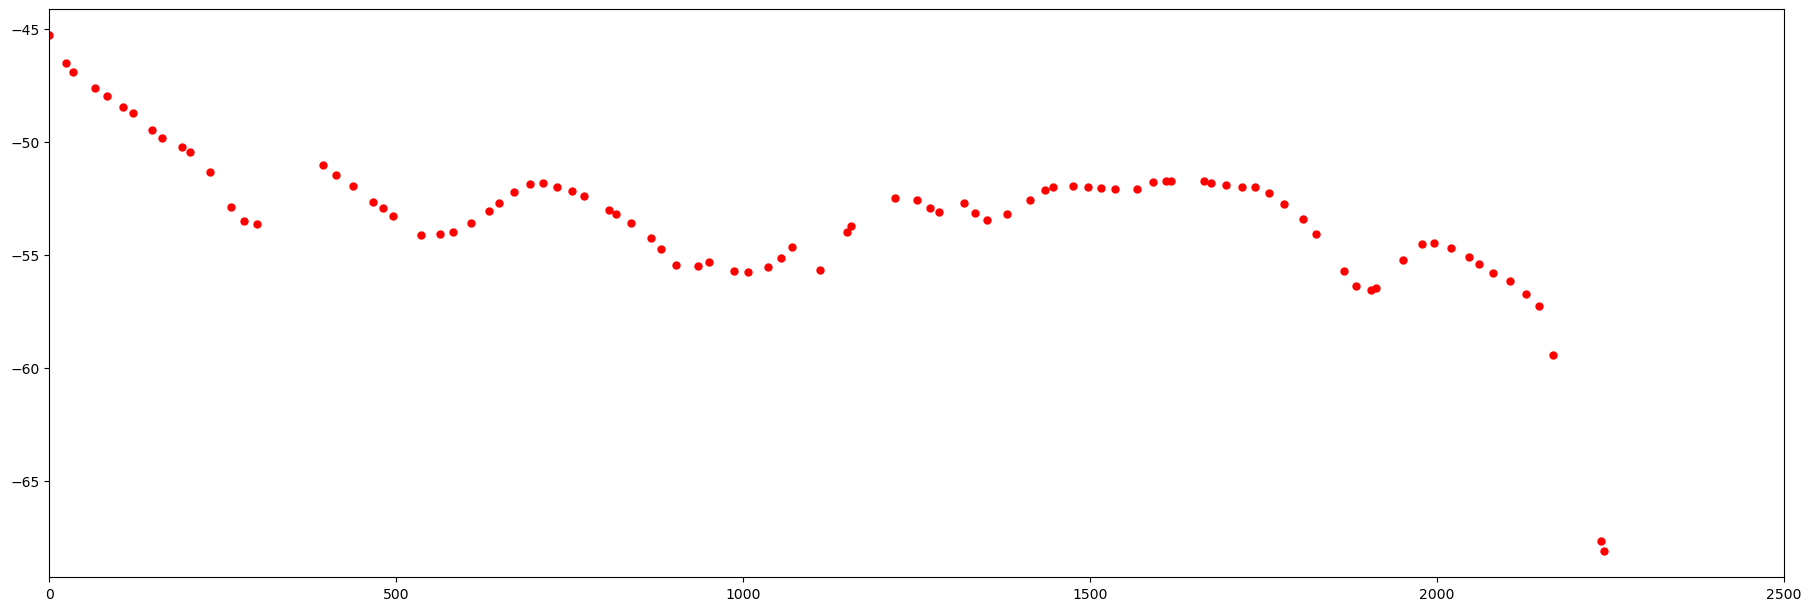

In [27]:
plot_atl06(gdf6, 0, 2500)

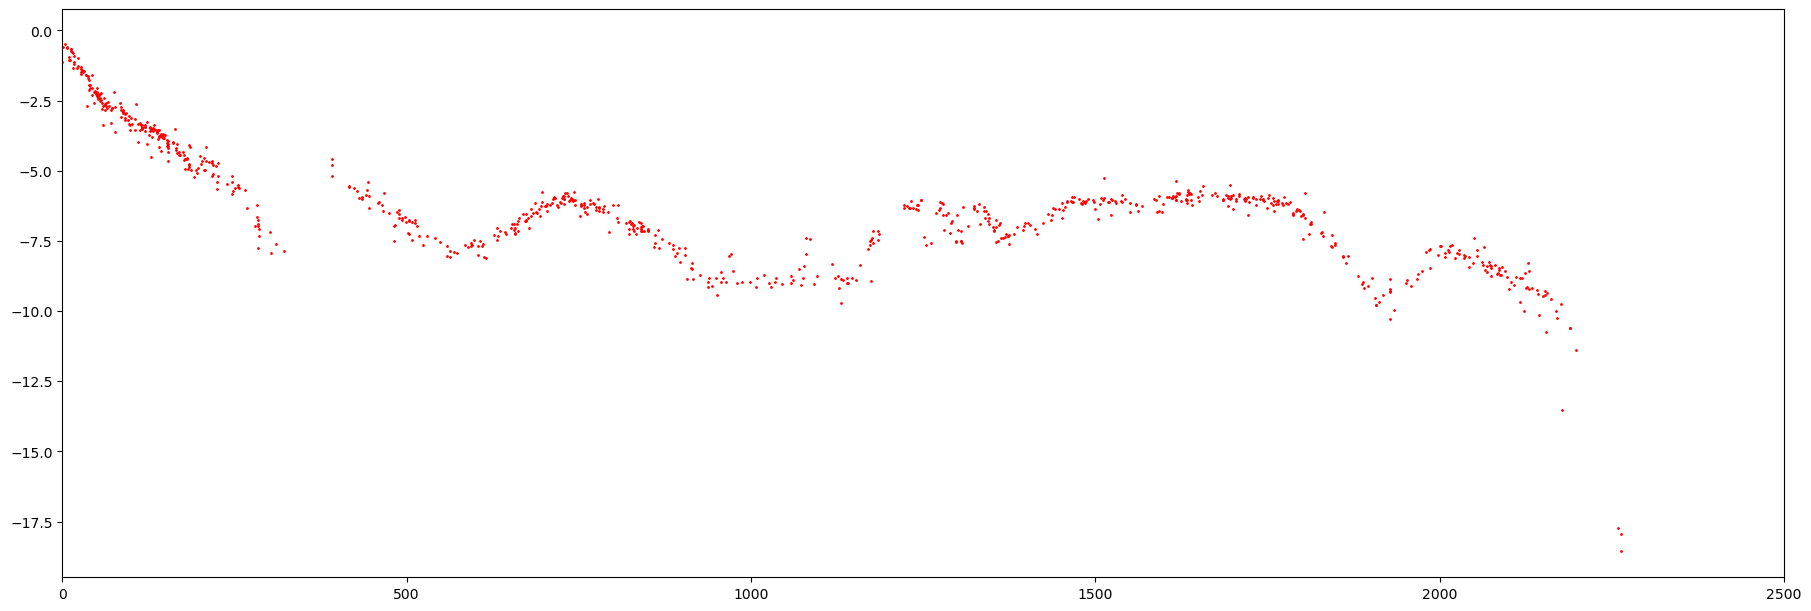

In [29]:
plot_atl24(gdf2, 0, 2500)

# (7) Filtered and Ancillary Access to ATL24

In [44]:
parms = {
    "atl24": {
        "class_ph": ["bathymetry"],
#        "confidence_threshold": 0.6,
#        "invalid_kd": False,
#        "invalid_wind_speed": False,
        "low_confidence": False,
#        "night": True,
#        "sensor_depth_exceeded": False,
        "anc_fields": ["index_ph", "index_seg"]
    },
    "beams": "gt3r", 
    "rgt": 202, 
    "cycle": 12
}
gdf7 = sliderule.run("atl24x", parms, aoi=aoi)

request <AppServer.304> retrieved 1 resources
Starting proxy for atl24x to process 1 resource(s) with 1 thread(s)
request <AppServer.305> on ATL03_20210706203010_02021201_006_01.h5 sent dataframe [gt3r] with 839 rows and 19 columns
Successfully completed processing resource [1 out of 1]: ATL03_20210706203010_02021201_006_01.h5
Writing arrow file: /tmp/tmpbnejpyrv
Closing arrow file: /tmp/tmpbnejpyrv


In [45]:
gdf7

,sensor_depth_exceeded,night_flag,region,class_ph,gt,sigma_tvu,surface_h,invalid_wind_speed,index_seg,sigma_thu,...,invalid_kd,low_confidence_flag,index_ph,confidence,spot,x_atc,y_atc,cycle,ellipse_h,geometry
time_ns,,,,,,,,,,,,,,,,,,,,,
2021-07-06 20:35:11.700463360,0,0,1,40,60,0.166414,0.469926,0,107089,7.071084,...,1,0,12931297,0.835062,1,2.147674e+06,-3246.468750,12,-44.525597,POINT (-69.53933 19.32204)
2021-07-06 20:35:11.700663040,0,0,1,40,60,0.166414,0.470413,0,107089,7.071082,...,1,0,12931326,0.834389,1,2.147675e+06,-3246.466553,12,-43.980129,POINT (-69.53934 19.32205)
2021-07-06 20:35:11.701063168,0,0,1,40,60,0.166414,0.471875,0,107089,7.071082,...,1,0,12931368,0.902136,1,2.147678e+06,-3246.469727,12,-43.897625,POINT (-69.53934 19.32207)
2021-07-06 20:35:11.701463296,0,0,1,40,60,0.166414,0.473334,0,107089,7.071082,...,1,0,12931415,0.903411,1,2.147681e+06,-3246.474121,12,-43.983887,POINT (-69.53934 19.32210)
2021-07-06 20:35:11.701463296,0,0,1,40,60,0.166414,0.473334,0,107089,7.071082,...,1,0,12931416,0.896865,1,2.147681e+06,-3246.474365,12,-44.020775,POINT (-69.53934 19.32210)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-06 20:35:12.017863168,0,0,1,40,60,0.166415,0.482601,0,107201,7.071239,...,1,0,12949785,0.840347,1,2.149933e+06,-3246.874268,12,-61.465424,POINT (-69.54145 19.34235)
2021-07-06 20:35:12.018363136,0,0,1,40,60,0.166415,0.481902,0,107202,7.071252,...,1,0,12949812,0.840347,1,2.149936e+06,-3246.905273,12,-62.319065,POINT (-69.54145 19.34238)
2021-07-06 20:35:12.018463232,0,0,1,40,60,0.166415,0.481733,0,107202,7.071243,...,1,0,12949816,0.943537,1,2.149937e+06,-3246.905273,12,-61.692062,POINT (-69.54145 19.34239)


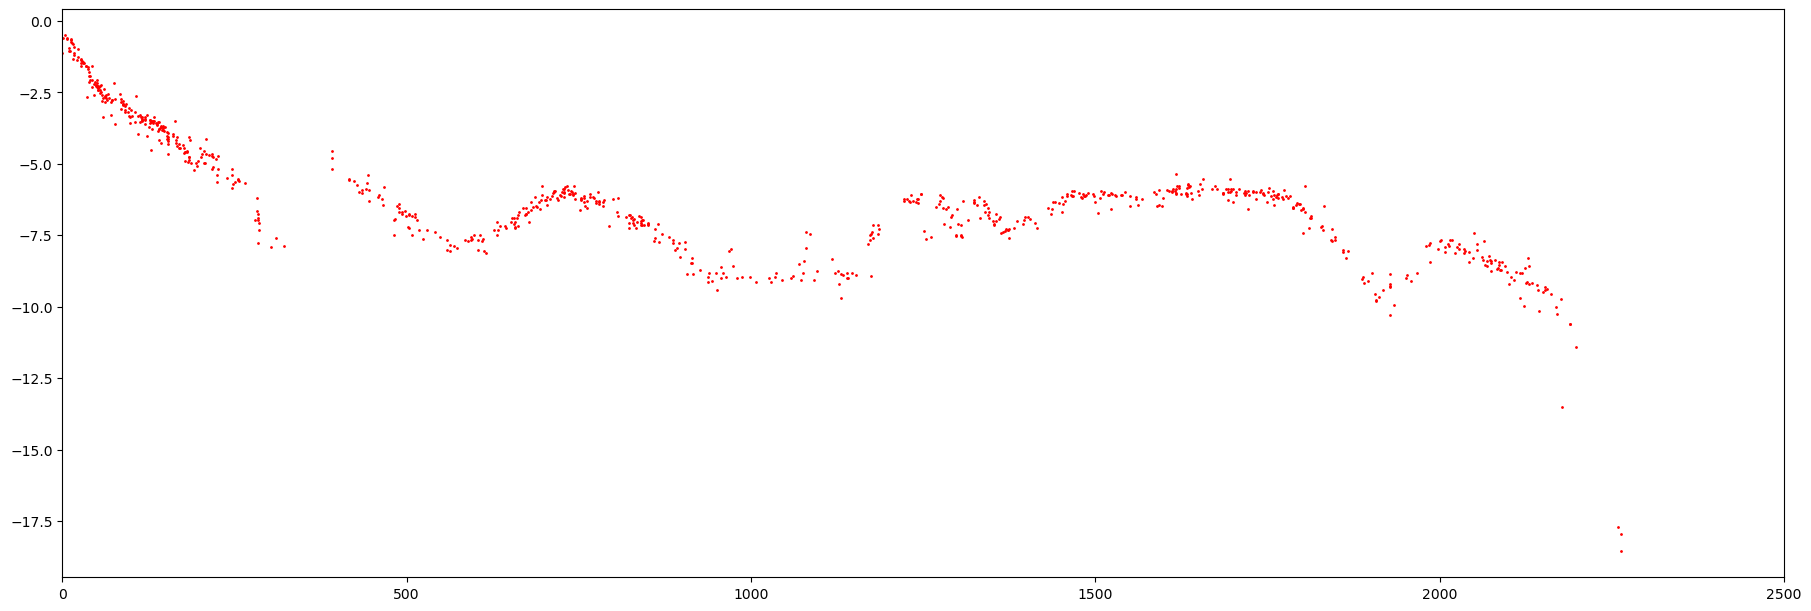

In [46]:
plot_atl24(gdf7, 0, 2500)